# Introducción al Procesamiento de Lenguaje Natural: Vectorización y Clasificación de Texto

## Objetivo del Notebook
Este notebook tiene como objetivo principal demostrar conceptos fundamentales en el Procesamiento de Lenguaje Natural (PLN):
1.  **Vectorización de Texto:** Aprender cómo se transforman las palabras y documentos en representaciones numéricas que pueden ser entendidas por algoritmos de Machine Learning, explorando técnicas como Bag-of-Words (BoW) y TF-IDF.
2.  **Clasificación de Texto:** Implementar un flujo de trabajo básico para clasificar reseñas de texto en categorías predefinidas (por ejemplo, positivo/negativo) utilizando un pipeline de Machine Learning.
3.  **Embeddings de Palabras:** Introducir el concepto de Word Embeddings (representaciones vectoriales de palabras densas) y cómo se pueden utilizar para capturar relaciones semánticas entre palabras.

## Pasos Realizados
El notebook está estructurado en las siguientes secciones:
* Importación de librerías esenciales para manipulación de datos, vectorización, modelado y evaluación.
* Demostración de **CountVectorizer (BoW)** para entender la representación de la frecuencia de palabras.
* Demostración de **TfidfVectorizer** para observar cómo se pondera la importancia de las palabras en un corpus.
* Implementación de un **Pipeline de Clasificación de Texto** utilizando TF-IDF y un clasificador Naive Bayes.
* Evaluación del modelo de clasificación mediante métricas clave y una matriz de confusión.
* Exploración de **Word Embeddings** (FastText) para visualizar cómo las palabras se representan en un espacio vectorial y sus propiedades semánticas.


## 1. Importación de Librerías Necesarias
Este script importa todas las bibliotecas de Python que se utilizarán a lo largo del notebook para manipulación de datos, tareas de PLN, machine learning y visualización.


In [1]:
# Para manipulación de datos y operaciones numéricas
import numpy as np
# Para vectorización y modelos de Machine Learning
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer      # Importa clases para vectorizar texto (BoW y TF-IDF)
from sklearn.model_selection import train_test_split                              # Importa función para dividir datos en conjuntos de entrenamiento y prueba
from sklearn.pipeline import Pipeline                                             # Importa la clase Pipeline para encadenar múltiples pasos de procesamiento
from sklearn.naive_bayes import MultinomialNB                                     # Importa el clasificador Naive Bayes Multinomial
from sklearn.linear_model import LogisticRegression                               # Importa el clasificador de Regresión Logística (aunque no se usa en este ejemplo, es común en clasificación de texto)
# Para evaluación de modelos
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay    # Importa funciones para evaluar el rendimiento del clasificador (reporte, matriz de confusión y su visualización)
# Para visualización (opcional, para la matriz de confusión)
import matplotlib.pyplot as plt                                                   # Importa la librería Matplotlib para crear gráficos

print("Librerías principales importadas.")

Librerías principales importadas.


##2. Demostración de CountVectorizer (Bag-of-Words) y TfidfVectorizer
Esta sección ilustra cómo CountVectorizer y TfidfVectorizer transforman un conjunto de documentos de texto (corpus) en representaciones numéricas, que son la base para el análisis y modelado en PLN.

In [2]:
# Demostración: CountVectorizer (Bag-of-Words) vs TfidfVectorizer

# Corpus de ejemplo (textos cortos en español)
corpus = [
    "qué bueno está la semita con chicharrones",
    "la semita sin sal no me pinta",
    "que rancio esta la semita",
    "me gustan las semitas bien calientes"
]

### 2.1 Usando CountVectorizer (Bolsa de Palabras simple)

In [3]:
# CountVectorizer convierte una colección de documentos de texto en una matriz de recuentos de tokens.
print("--- CountVectorizer (BoW) ---")
count_vectorizer = CountVectorizer() # Instancia un objeto CountVectorizer
bow_matrix = count_vectorizer.fit_transform(corpus) # Aprende el vocabulario del corpus y transforma los textos en una matriz BoW

# Mostramos el vocabulario (las "features")
print("Vocabulario (Features):")
print(count_vectorizer.get_feature_names_out()) # Muestra las palabras únicas (features) que CountVectorizer aprendió del corpus

# Mostramos la matriz BoW (dispersa)
print("\nMatriz BoW (Documento x Palabra):")
print(bow_matrix.toarray()) # Convierte la matriz dispersa (sparse matrix) a una matriz densa (numpy array) y la imprime
print("-" * 30)

--- CountVectorizer (BoW) ---
Vocabulario (Features):
['bien' 'bueno' 'calientes' 'chicharrones' 'con' 'esta' 'está' 'gustan'
 'la' 'las' 'me' 'no' 'pinta' 'que' 'qué' 'rancio' 'sal' 'semita'
 'semitas' 'sin']

Matriz BoW (Documento x Palabra):
[[0 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 1]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 1 0 0]
 [1 0 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0]]
------------------------------


## 2.2 Usando TfidfVectorizer

In [4]:
# TfidfVectorizer convierte una colección de documentos de texto en una matriz de características TF-IDF.
# TF-IDF (Term Frequency-Inverse Document Frequency) es una medida de la importancia de una palabra en un documento en relación con todo el corpus.

print("\n--- TfidfVectorizer ---")
tfidf_vectorizer = TfidfVectorizer() # Instancia un objeto TfidfVectorizer
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus) # Aprende el vocabulario y transforma los textos en una matriz TF-IDF

# El vocabulario es el mismo (si no cambiamos parámetros)
# print("Vocabulario (Features):") # Ya se mostró el vocabulario con CountVectorizer, es el mismo por defecto
# print(tfidf_vectorizer.get_feature_names_out())

# Mostramos la matriz TF-IDF
print("Matriz TF-IDF (Documento x Palabra):")
print(tfidf_matrix.toarray()) # Convierte la matriz dispersa TF-IDF a una matriz densa y la imprime
print("-" * 30) # Separador visual



--- TfidfVectorizer ---
Matriz TF-IDF (Documento x Palabra):
[[0.         0.4146979  0.         0.4146979  0.4146979  0.
  0.4146979  0.         0.2646963  0.         0.         0.
  0.         0.         0.4146979  0.         0.         0.2646963
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.27375357 0.         0.33814012 0.42888787
  0.42888787 0.         0.         0.         0.42888787 0.27375357
  0.         0.42888787]
 [0.         0.         0.         0.         0.         0.51199172
  0.         0.         0.32679768 0.         0.         0.
  0.         0.51199172 0.         0.51199172 0.         0.32679768
  0.         0.        ]
 [0.42176478 0.         0.42176478 0.         0.         0.
  0.         0.42176478 0.         0.42176478 0.3325242  0.
  0.         0.         0.         0.         0.         0.
  0.42176478 0.        ]]
------------------------------


--- Observaciones ---
* Nota 1: Compara los valores de palabras comunes como 'mate', 'el', 'está'.

En BoW son solo cuentas de frecuencia. En TF-IDF, su peso se ajusta por la frecuencia inversa en los documentos (IDF). Palabras más 'distintivas' de un      documento (ej. 'dulce', 'caliente', 'che') tienden a tener mayor peso TF-IDF relativo que palabras muy comunes en *todo* el corpus. Esto se debe a que TF-IDF penaliza las palabras frecuentes en todo el corpus y recompensa las palabras raras que son más discriminatorias.
* Nota 2: Ambas matrices son 'dispersas' (muchos ceros). Esto es eficiente para grandes corpus ya que la mayoría de las palabras no aparecen en la mayoría de los documentos.

### 3. Añadiendo N-Gramas a TF-IDF

In [5]:
print("\n--- TfidfVectorizer con N-Gramas (bigramas) ---")

# Usamos el mismo corpus de antes
# Creamos un nuevo vectorizador, ahora especificando ngram_range
# ngram_range=(1, 2) significa: usa unigramas (palabras solas) Y bigramas (pares de palabras)
tfidf_ngram_vectorizer = TfidfVectorizer(ngram_range=(1, 2))
tfidf_ngram_matrix = tfidf_ngram_vectorizer.fit_transform(corpus)

# Mostramos el NUEVO vocabulario, que ahora incluye bigramas
print("Vocabulario con unigramas y bigramas:")
print(tfidf_ngram_vectorizer.get_feature_names_out())

# Mostramos la nueva matriz TF-IDF (será más ancha)
print("\nMatriz TF-IDF con N-Gramas:")
print(tfidf_ngram_matrix.toarray())
print("-" * 30)


--- TfidfVectorizer con N-Gramas (bigramas) ---
Vocabulario con unigramas y bigramas:
['bien' 'bien calientes' 'bueno' 'bueno está' 'calientes' 'chicharrones'
 'con' 'con chicharrones' 'esta' 'esta la' 'está' 'está la' 'gustan'
 'gustan las' 'la' 'la semita' 'las' 'las semitas' 'me' 'me gustan'
 'me pinta' 'no' 'no me' 'pinta' 'que' 'que rancio' 'qué' 'qué bueno'
 'rancio' 'rancio esta' 'sal' 'sal no' 'semita' 'semita con' 'semita sin'
 'semitas' 'semitas bien' 'sin' 'sin sal']

Matriz TF-IDF con N-Gramas:
[[0.         0.         0.29851104 0.29851104 0.         0.29851104
  0.29851104 0.29851104 0.         0.         0.29851104 0.29851104
  0.         0.         0.19053573 0.19053573 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.29851104 0.29851104 0.         0.
  0.         0.         0.19053573 0.29851104 0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.

--- Observaciones ---
* Nota 1:

Fíjate cómo aparecen términos como "mate amargo", "qué bueno", "no me", etc.

Estos bigramas capturan un poco del contexto local y pueden ser features

Muy útiles para los modelos. Por ejemplo, 'amargo' solo y 'mate amargo'

Aportan información diferente.
* Nota 2:

El número de features (columnas) aumenta considerablemente.

##3. Demostración: Pipeline de Clasificación de Texto y Evaluación
Esta sección demuestra cómo construir un pipeline de Machine Learning para clasificar texto. Se prepara un conjunto de datos de ejemplo, se divide en conjuntos de entrenamiento y prueba, y se entrena y evalúa un modelo de clasificación.

###3.1 Datos de Ejemplo (Simples, para clasificación binaria: Positivo/Negativo)


In [6]:
# Define una lista de textos (reseñas de ejemplo)
textos = [
    "La milanesa a caballo estaba espectacular!", # Positivo
    "Qué buena onda la atención en el bar.",      # Positivo
    "El flan con dulce de leche es lo más.",      # Positivo
    "El bife de chorizo llegó frío y duro.",      # Negativo
    "Mucho quilombo, tardaron una banda en traer la cuenta.", # Negativo
    "La verdad, la pizza dejaba bastante que desear.", # Negativo
    "Estaba mansa la semita que me mande", # Positivo
    "Terrible olor a sopa tenes", # Negativo
    "El dia esta como para partirse unas tortas fritas", # Positivo
    "Tengo alta pasta ir a laburar", # Negativo
    "Esa remera te queda horriblemente bien", # Negativo
]
# Define las etiquetas correspondientes a cada texto: 1 para Positivo, 0 para Negativo
labels = np.array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0])



### 3.2 Dividir datos en Entrenamiento y Prueba

In [7]:

# train_test_split divide los datos en subconjuntos aleatorios para entrenamiento y prueba.
X_train, X_test, y_train, y_test = train_test_split(textos, labels, test_size=0.33, random_state=42)
# test_size=0.33 significa que aproximadamente un tercio de los datos se usará para el conjunto de prueba.
# random_state=42 asegura que la división de los datos sea la misma cada vez que se ejecute el código (reproducibilidad).

print(f"Textos de entrenamiento: {len(X_train)}") # Imprime el número de textos en el conjunto de entrenamiento
print(f"Textos de prueba: {len(X_test)}") # Imprime el número de textos en el conjunto de prueba
print("-" * 30) # Separador visual

Textos de entrenamiento: 7
Textos de prueba: 4
------------------------------


### 3.3 Crear y Entrenar un Pipeline (TF-IDF + Naive Bayes)

In [8]:
# Un Pipeline encadena múltiples pasos de procesamiento de datos y un estimador final.
# Simplifica el flujo de trabajo y previene el "data leakage".
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,1))), # Primer paso: vectorizar texto usando TF-IDF. ngram_range=(1,1) significa que solo se consideran palabras individuales (unigramas).
    ('clf', MultinomialNB()) # Segundo paso: clasificador Naive Bayes Multinomial, adecuado para datos de conteo/frecuencia.
])

print("\nEntrenando el Pipeline (TF-IDF + Naive Bayes)...") # Mensaje indicando el inicio del entrenamiento
# Entrenamos el pipeline COMPLETO con los datos de texto CRUDOS de entrenamiento (X_train) y sus etiquetas (y_train).
# El pipeline internamente se encarga de la vectorización antes de entrenar el clasificador.
pipeline_nb.fit(X_train, y_train)
print("Entrenamiento completado.") # Mensaje indicando la finalización del entrenamiento
print("-" * 30) # Separador visual


Entrenando el Pipeline (TF-IDF + Naive Bayes)...
Entrenamiento completado.
------------------------------


### 3.4 Realizar Predicciones sobre los datos de Prueba

In [9]:
print("\nRealizando predicciones sobre el conjunto de prueba...") # Mensaje indicando el inicio de las predicciones
y_pred_nb = pipeline_nb.predict(X_test) # Utiliza el pipeline entrenado para predecir las etiquetas del conjunto de prueba

print(f"Predicciones: {y_pred_nb}") # Imprime las etiquetas predichas por el modelo
print(f"Etiquetas Reales: {y_test}") # Imprime las etiquetas verdaderas del conjunto de prueba
print("-" * 30) # Separador visual


Realizando predicciones sobre el conjunto de prueba...
Predicciones: [1 1 1 1]
Etiquetas Reales: [0 1 0 0]
------------------------------


### 3.5 Evaluar el Modelo
Evalúa el rendimiento del modelo utilizando métricas comunes y una matriz de confusión.


--- Evaluación del Modelo (Naive Bayes) ---
              precision    recall  f1-score   support

Negativo (0)       0.00      0.00      0.00         3
Positivo (1)       0.25      1.00      0.40         1

    accuracy                           0.25         4
   macro avg       0.12      0.50      0.20         4
weighted avg       0.06      0.25      0.10         4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))




Matriz de Confusión:


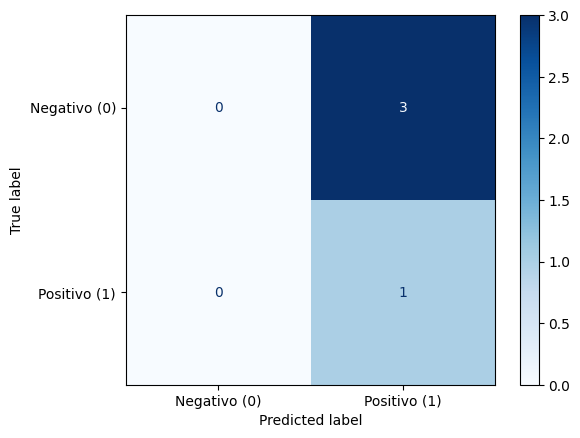

In [10]:
print("\n--- Evaluación del Modelo (Naive Bayes) ---")
# classification_report genera un informe de texto que muestra la precisión (precision), la exhaustividad (recall)
# y la puntuación F1 (f1-score) para cada clase, así como promedios.
print(classification_report(y_test, y_pred_nb, target_names=['Negativo (0)', 'Positivo (1)']))

# Matriz de Confusión
print("\nMatriz de Confusión:")
cm_nb = confusion_matrix(y_test, y_pred_nb) # Calcula la matriz de confusión
# ConfusionMatrixDisplay es una clase para dibujar una matriz de confusión de manera visual.
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Negativo (0)', 'Positivo (1)'])
disp_nb.plot(cmap=plt.cm.Blues) # Dibuja la matriz de confusión con un mapa de color azul
plt.show() # Muestra el gráfico de la matriz de confusión

--- Observaciones ---
* Nota 1:

El Pipeline simplifica enormemente el flujo. Entrenamos con texto crudo y predice con texto crudo.

La vectorización ocurre internamente dentro del pipeline de forma automática.

* Nota 2:

El 'classification_report' es CLAVE. Muestra Precision, Recall y F1-Score para cada clase. Es importante fijarse si el modelo funciona igual de bien para ambas clases.

'support' indica cuántas muestras de cada clase había en el conjunto de prueba (test set).

* Nota 3:

La Matriz de Confusión ayuda a ver *dónde* el modelo se equivoca.

La Diagonal principal representa los aciertos (predicciones correctas).

Los valores fuera de la diagonal representan los errores (predicciones incorrectas).

(Fila = Etiqueta Real, Columna = Etiqueta Predicha).

## 4. Exploración de Word Embeddings (FastText)
Esta sección introduce los Word Embeddings, que son representaciones densas y de baja dimensión de palabras. A diferencia de BoW y TF-IDF, los embeddings capturan relaciones semánticas entre palabras. Aquí se utiliza un modelo pre-entrenado de FastText.

* Nota: Se recomienda ejecutar las siguientes líneas en un entorno de cuaderno (como Jupyter) y reiniciar el kernel después de la instalación/desinstalación si es necesario para asegurar la compatibilidad. Esto es para asegurar que las versiones de numpy, scipy y gensim sean compatibles.

In [11]:
!pip install --upgrade numpy scipy gensim # Actualiza las librerías numpy, scipy y gensim. (Descomentar si es necesario)

!pip uninstall gensim -y # Desinstala la versión actual de gensim. (Descomentar si hay problemas de compatibilidad)
!pip install gensim # Reinstala gensim para asegurar la compatibilidad con la versión de NumPy. (Descomentar si hay problemas de compatibilidad)
# # Es crucial reiniciar el kernel después de estas operaciones para que los cambios surtan efecto.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 3.2 MB/s eta 0:00:00
Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)


In [12]:
import gensim.downloader as api # Importa la API de descarga de modelos pre-entrenados de Gensim
from gensim.models import KeyedVectors # Importa KeyedVectors para cargar y trabajar con modelos de Word Embeddings


In [13]:
# List available models to find the correct name
print(api.info()['models'].keys())

dict_keys(['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis'])


In [14]:
# List available models to find the correct name
# print(api.info()['models'].keys()) # Descomentar para ver la lista de modelos disponibles para descargar


In [15]:
model_name = 'fasttext-wiki-news-subwords-300' # Define el nombre del modelo de FastText a descargar (contiene 300 dimensiones)
word_vectors = api.load(model_name) # Carga el modelo pre-entrenado de vectores de palabras. Esto puede tardar la primera vez.

print(f"Modelo cargado. Vocabulario: {len(word_vectors.index_to_key)} palabras.") # Imprime el número de palabras en el vocabulario del modelo
modelo_cargado = True # Bandera para indicar que el modelo se cargó correctamente

[==================================================] 100.0% 958.5/958.4MB downloaded
Modelo cargado. Vocabulario: 999999 palabras.


In [16]:
if modelo_cargado:
    # a) Obtener el vector de una palabra
    try:
        vector_auto = word_vectors['auto'] # Obtiene el vector numérico (embedding) para la palabra 'auto'
        print(f"Vector para 'auto' (primeros 10 de {len(vector_auto)} dimensiones):") # Imprime el mensaje y las dimensiones del vector
        print(vector_auto[:10]) # Imprime los primeros 10 elementos del vector
        print(f"Forma del vector: {vector_auto.shape}") # Imprime la forma del vector (número de dimensiones)
    except KeyError: # Maneja el error si la palabra no se encuentra en el vocabulario del modelo
        print("La palabra 'auto' no está en el vocabulario.")
    print("-" * 30) # Separador visual

    # b) Encontrar palabras similares (similitud coseno)
    try:
        # most_similar encuentra las palabras más similares a una dada basándose en la similitud coseno de sus vectores.
        similares_mate = word_vectors.most_similar('cucaracha', topn=10) # Encuentra las 10 palabras más similares a 'cucaracha'
        print("Palabras más similares a 'cucaracha':") # Imprime el mensaje
        for palabra, score in similares_mate: # Itera sobre la lista de palabras similares y sus puntajes
            print(f"- {palabra}: {score:.5f}") # Muestra la palabra y su puntaje de similitud (redondeado a 5 decimales)
    except KeyError: # Maneja el error si la palabra no se encuentra en el vocabulario del modelo
        print("La palabra 'cucaracha' no está en el vocabulario.")
    print("-" * 30) # Separador visual

    # c) Realizar analogías vectoriales (el famoso ejemplo rey/reina)
    try:
        # most_similar también puede resolver analogías del tipo A es a B como C es a D (A - B + C = D)
        # Se suman los vectores de las palabras 'positivas' y se restan los de las 'negativas'.
        analogia = word_vectors.most_similar(positive=['Viento', 'Tormenta'], negative=['Agua'], topn=2) # Busca palabras que completen la analogía
        print("Analogía: Viento - Agua + Tormenta ≈ ???") # Imprime la pregunta de la analogía
        print(f"Resultado más probable: {analogia[0][0]} (Score: {analogia[0][1]:.4f})") # Imprime la palabra más probable y su puntaje
    except KeyError as e: # Maneja el error si alguna palabra en la analogía no está en el vocabulario
        print(f"Error en la analogía: Falta la palabra '{e.args[0]}' en el vocabulario.")
    print("-" * 30) # Separador visual

Vector para 'auto' (primeros 10 de 300 dimensiones):
[ 0.050735 -0.026908  0.11211   0.042649 -0.093272 -0.077388 -0.07398
 -0.12486   0.13714  -0.049054]
Forma del vector: (300,)
------------------------------
Palabras más similares a 'cucaracha':
- Cucaracha: 0.82879
- camiseta: 0.70756
- huarache: 0.70504
- rubia: 0.69016
- saca: 0.68864
- Apucarana: 0.68624
- malaga: 0.68228
- pacha: 0.68184
- cuna: 0.67982
- paloma: 0.67726
------------------------------
Analogía: Viento - Agua + Tormenta ≈ ???
Resultado más probable: Tormento (Score: 0.7332)
------------------------------


## Conclusión
Este notebook ha proporcionado una introducción práctica y detallada a conceptos clave en el Procesamiento de Lenguaje Natural. Hemos cubierto los siguientes puntos:

* Representación de Texto:

Comprendimos cómo los textos pueden ser transformados en formatos numéricos mediante Bag-of-Words (BoW), que cuenta la frecuencia de las palabras, y TF-IDF, que pondera la importancia de las palabras en función de su rareza en el corpus completo. La diferencia clave es que TF-IDF asigna menor peso a palabras muy comunes que no son discriminatorias.
* Clasificación de Texto:

Implementamos un flujo de trabajo completo para la clasificación de texto utilizando un Pipeline de scikit-learn. Esto incluyó la vectorización con TF-IDF y la clasificación con un modelo Naive Bayes. La evaluación con el reporte de clasificación y la matriz de confusión nos permitió entender el rendimiento del modelo, identificando aciertos y errores.
* Word Embeddings:

Introdujimos los Word Embeddings como una forma más sofisticada de representar palabras en un espacio vectorial denso, donde las relaciones semánticas se capturan mediante la proximidad de los vectores. Observamos cómo modelos pre-entrenados como FastText pueden identificar palabras similares y resolver analogías, lo que demuestra su capacidad para comprender el significado contextual de las palabras.